In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import PySpin
import sys

In [32]:
from multicamera_acquisition.interfaces import get_camera

In [33]:
camera_list = [
    {'name': 'top', 'serial': 22181547},
    #{'name': 'side1', 'serial': 22181612},
]

In [34]:
serial_number = 22181547
exposure_time = 2000

In [35]:
cam = get_camera(
    brand="flir",
    serial_number=serial_number,
    exposure_time=exposure_time,
    gain=15,
    trigger="manual",
)

In [36]:
cam.cam

<PySpin.CameraPtr; proxy of <Swig Object of type 'Spinnaker::CameraPtr *' at 0x7f5b93a26700> >

In [37]:
# Check the reference count of the camera object
ref_count = sys.getrefcount(cam.cam)

print(f"Reference count of the camera object: {ref_count}")

Reference count of the camera object: 9


In [38]:
if False:
    node_acquisition_mode = PySpin.CEnumerationPtr(cam.cam.GetNodeMap().GetNode('AcquisitionMode'))
    PySpin.IsReadable(node_acquisition_mode)
    PySpin.IsWritable(node_acquisition_mode)
    node_acquisition_mode_continuous = node_acquisition_mode.GetEntryByName('Continuous')
    PySpin.IsReadable(node_acquisition_mode_continuous)
    acquisition_mode_continuous = node_acquisition_mode_continuous.GetValue()
    node_acquisition_mode.SetIntValue(acquisition_mode_continuous)

In [39]:
# cam.cam.BeginAcquisition()

In [40]:
#cam.system.ReleaseInstance()
#cam.cam.EndAcquisition()
#cam.cam.DeInit()

In [41]:
# initialize camera
cam.init()

In [42]:
# start acquisition
cam.start()

In [43]:
frame, timestamp = cam.get_array(timeout=1000, get_timestamp=True)

In [44]:
import matplotlib.pyplot as plt

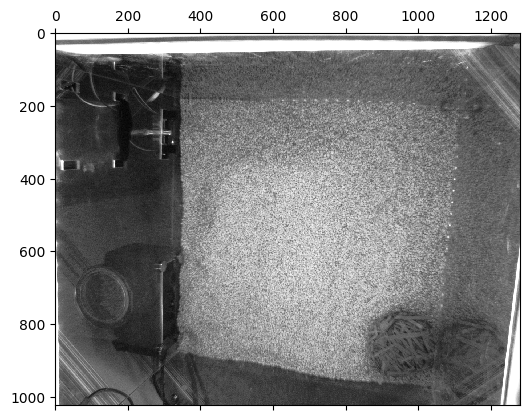

In [45]:
plt.matshow(frame, cmap = 'Greys_r')

In [46]:
import sys

# Check the reference count of the camera object
ref_count = sys.getrefcount(cam.cam)

print(f"Reference count of the camera object: {ref_count}")

Reference count of the camera object: 8


In [18]:
cam.close()

### Test re-initialization

In [19]:
#frame, timestamp = cam.get_array(timeout=1000, get_timestamp=True)

In [20]:
cam = get_camera(
    brand="flir",
    serial_number=serial_number,
    exposure_time=exposure_time,
    gain=15,
    trigger="manual",
)

In [21]:
cam.cam

<PySpin.CameraPtr; proxy of <Swig Object of type 'Spinnaker::CameraPtr *' at 0x7f5b787403f0> >

In [22]:
# Check the reference count of the camera object
ref_count = sys.getrefcount(cam.cam)

print(f"Reference count of the camera object: {ref_count}")

Reference count of the camera object: 9


In [23]:
# initialize camera
cam.init()

In [24]:
# start acquisition
cam.start()

In [25]:
frame, timestamp = cam.get_array(timeout=1000, get_timestamp=True)

In [26]:
import matplotlib.pyplot as plt

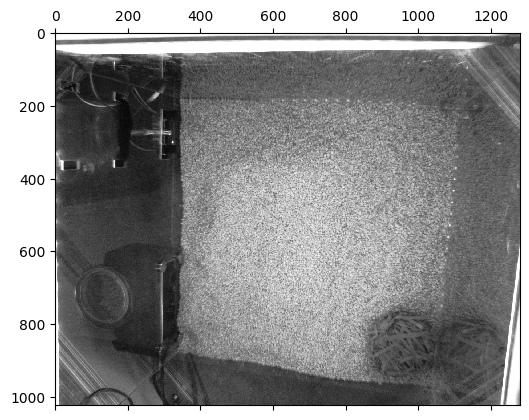

In [27]:
plt.matshow(frame, cmap = 'Greys_r')

In [28]:
# Check the reference count of the camera object
ref_count = sys.getrefcount(cam.cam)

print(f"Reference count of the camera object: {ref_count}")

Reference count of the camera object: 8


In [29]:
cam.close()